In [1]:
%load_ext autoreload
%autoreload 2

### Load constants

In [2]:
from src.constants import (
    RAW_DIR_PATH,
    INTERIM_DIR_PATH,
    PROCESSED_DIR_PATH
)

### Load libs

In [3]:
import os

from imagededup.methods import CNN

from src.data.utils import load_json_as_df, create_dir
from src.data.image_utils import download_images_from_group
from src.models.dedup_model import find_duplicates
from src.features.dedup_model import load_results, display_duplicated_images

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [4]:
images_json_file_name = "images.json"
images_json_file_path = os.path.join(RAW_DIR_PATH, images_json_file_name)

In [5]:
images_df = load_json_as_df(images_json_file_path, index_col="image_id")
images_df.head()

group_id                                          image_url
image_id                                                                  
1         2224086878288  https://i.travelapi.com/hotels/57000000/569800...
2         2224086878288  https://i.travelapi.com/hotels/57000000/569800...
3         2224086878288  https://i.travelapi.com/hotels/57000000/569800...
4         2224086878288  https://i.travelapi.com/hotels/57000000/569800...
5         2224086878288  https://i.travelapi.com/hotels/57000000/569800...

In [6]:
images_dir_path = os.path.join(INTERIM_DIR_PATH, "images")
create_dir(images_dir_path)

In [7]:
groups = images_df["group_id"].unique().tolist()
print("Length of groups: ", len(groups))
groups[:5]

Length of groups:  365


['2224086878288',
 '20234819560905',
 '39095384769302',
 '59718437804789',
 '74551318319906']

In [8]:
group_id = groups[0]
print(f"Group ID: {group_id}")

Group ID: 2224086878288


In [9]:
encoder = CNN()

results_dir_path = os.path.join(PROCESSED_DIR_PATH, "results")
create_dir(results_dir_path)

/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2023-01-13 20:57:57,281: INFO Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer


In [10]:
download_images_from_group(images_df, group_id, images_dir_path)

210it [01:29,  2.35it/s]


In [11]:
results_dir_path = os.path.join(PROCESSED_DIR_PATH, "dedup_results")
create_dir(results_dir_path)

In [12]:
find_duplicates(
    encoder, 
    group_id, 
    images_dir_path, 
    results_dir_path
)

2023-01-13 20:59:26,642: INFO Start: Image encoding generation
2023-01-13 20:59:36,365: INFO End: Image encoding generation
2023-01-13 20:59:36,639: INFO Start: Calculating cosine similarities...
2023-01-13 20:59:36,643: INFO End: Calculating cosine similarities.
2023-01-13 20:59:36,661: INFO Start: Saving duplicates as json!
2023-01-13 20:59:36,680: INFO End: Saving duplicates as json!


In [13]:
results = load_results(group_id, results_dir_path)
results

{'1.jpg': [['108.jpg', 0.8954224586486816],
  ['119.jpg', 0.9999999403953552],
  ['127.jpg', 0.9999999403953552],
  ['145.jpg', 0.8954224586486816],
  ['176.jpg', 0.8954224586486816],
  ['192.jpg', 0.861783504486084],
  ['194.jpg', 0.861783504486084],
  ['202.jpg', 0.861783504486084],
  ['24.jpg', 0.861783504486084],
  ['25.jpg', 0.861783504486084],
  ['28.jpg', 0.8954224586486816],
  ['5.jpg', 0.8954224586486816],
  ['64.jpg', 0.9999999403953552],
  ['87.jpg', 0.9999999403953552]],
 '10.jpg': [['154.jpg', 1.000000238418579],
  ['158.jpg', 0.8560693264007568],
  ['178.jpg', 1.000000238418579],
  ['2.jpg', 0.8560693264007568],
  ['35.jpg', 1.000000238418579],
  ['48.jpg', 0.8560693264007568],
  ['56.jpg', 1.000000238418579],
  ['62.jpg', 0.8560693264007568],
  ['83.jpg', 0.8560693264007568]],
 '100.jpg': [['146.jpg', 0.9999997615814209],
  ['78.jpg', 0.9999997615814209],
  ['8.jpg', 0.9999997615814209],
  ['94.jpg', 0.9999997615814209]],
 '101.jpg': [['128.jpg', 0.8809066414833069],
  [

Base image: 1.jpg


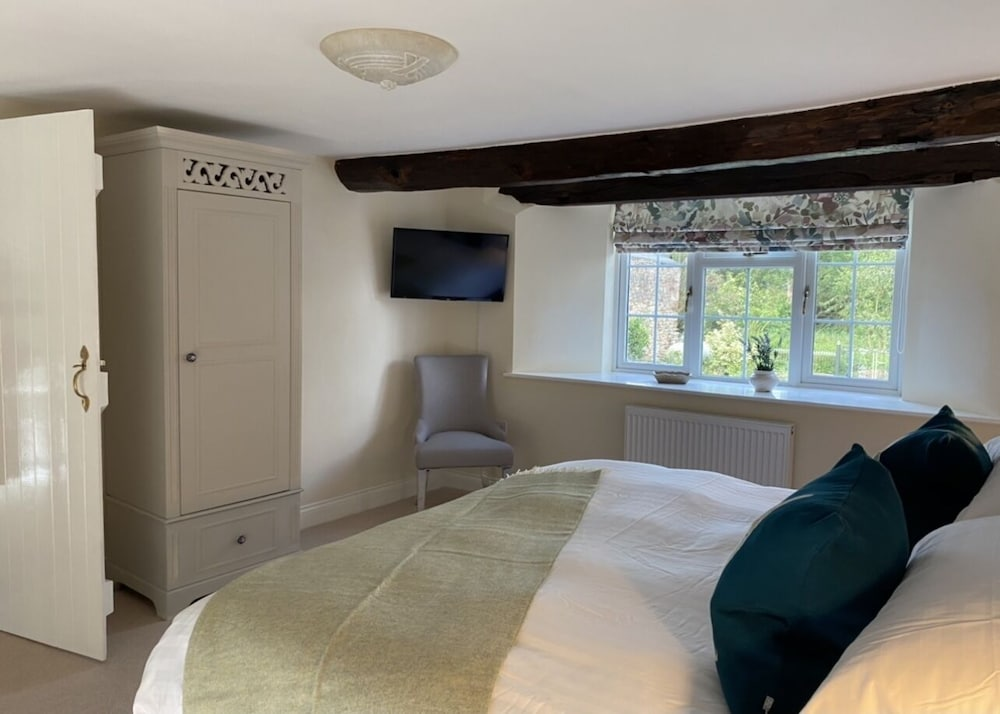

Duplicated image 1 (similarity: 89.54%): 108.jpg


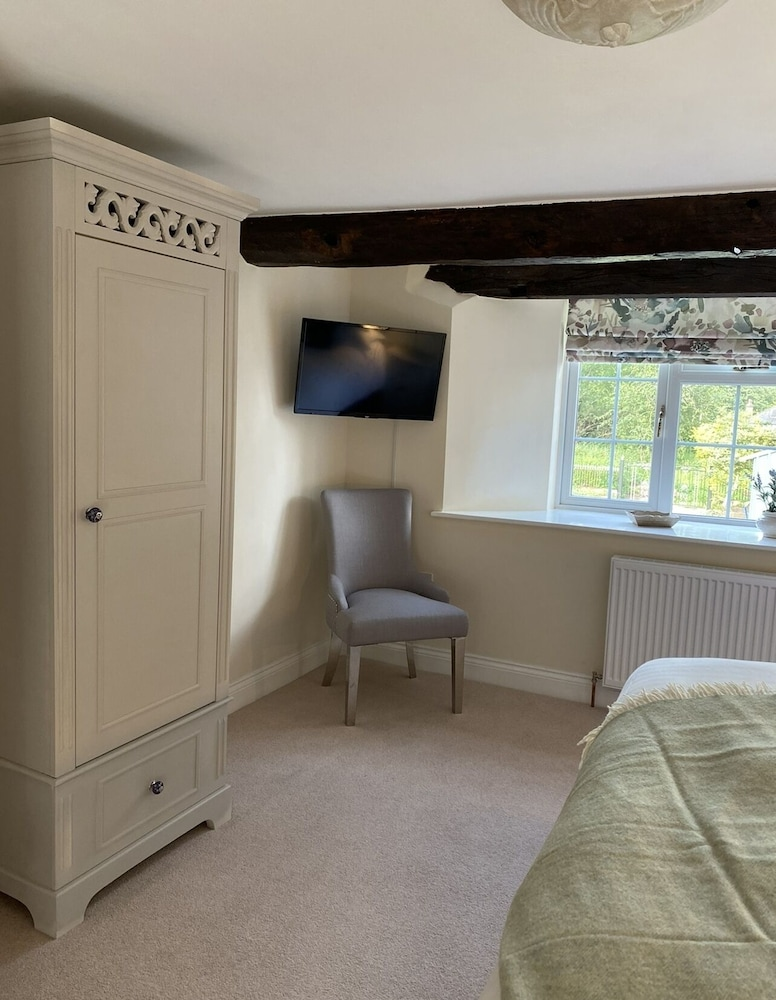

Duplicated image 2 (similarity: 100.00%): 119.jpg


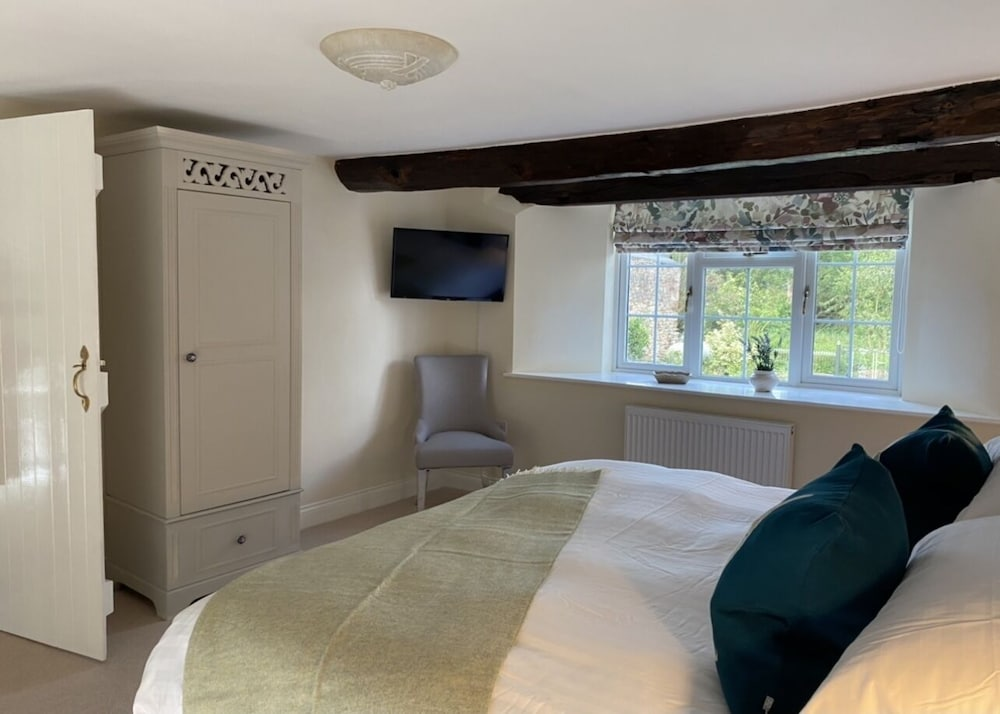

Duplicated image 3 (similarity: 100.00%): 127.jpg


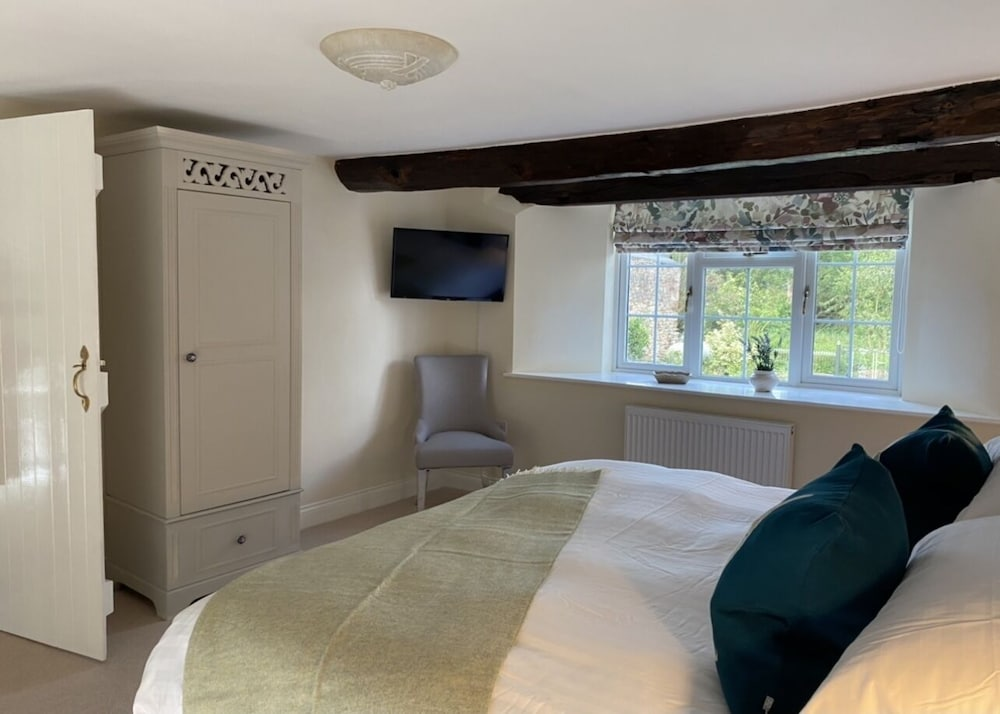

Duplicated image 4 (similarity: 89.54%): 145.jpg


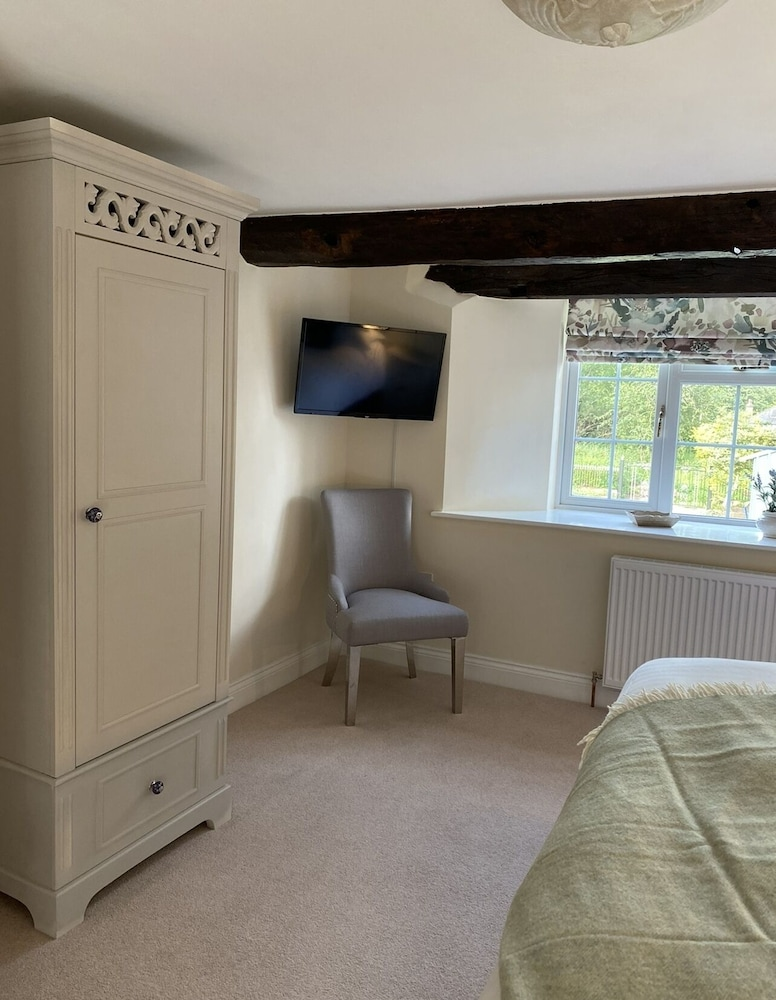

Duplicated image 5 (similarity: 89.54%): 176.jpg


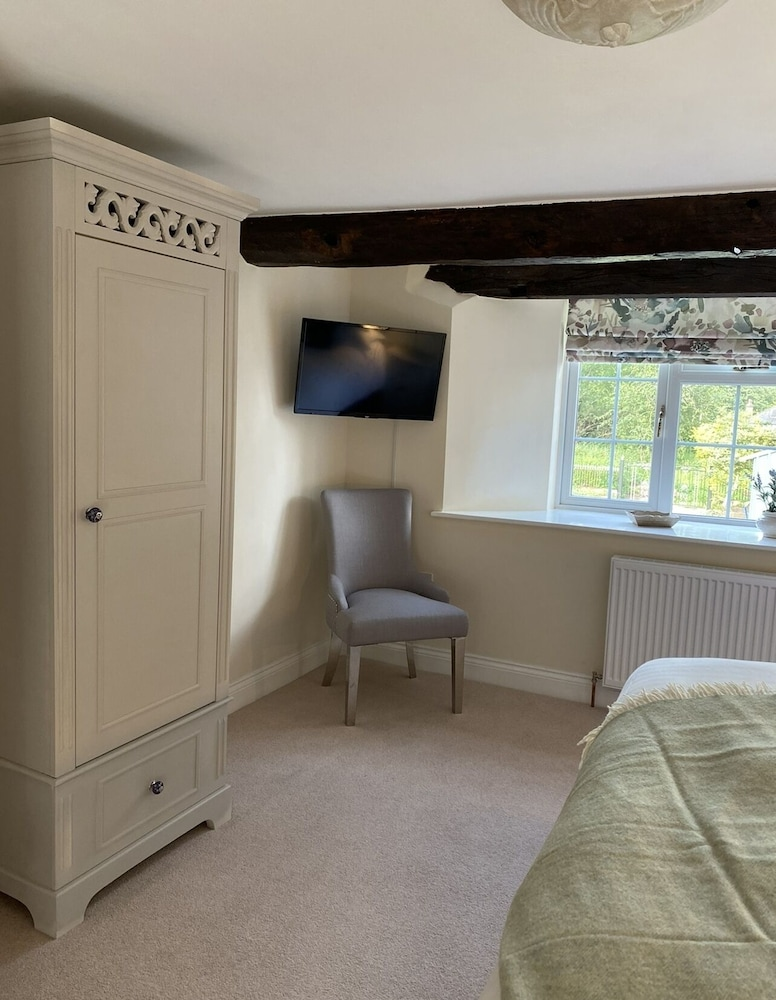

Duplicated image 6 (similarity: 86.18%): 192.jpg


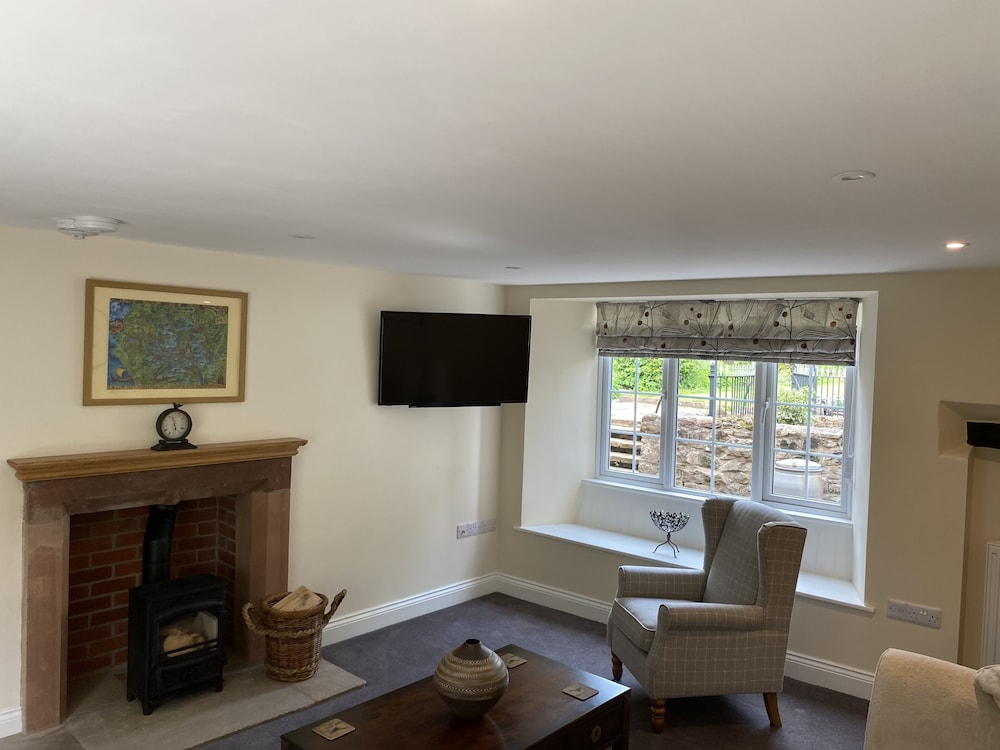

Duplicated image 7 (similarity: 86.18%): 194.jpg


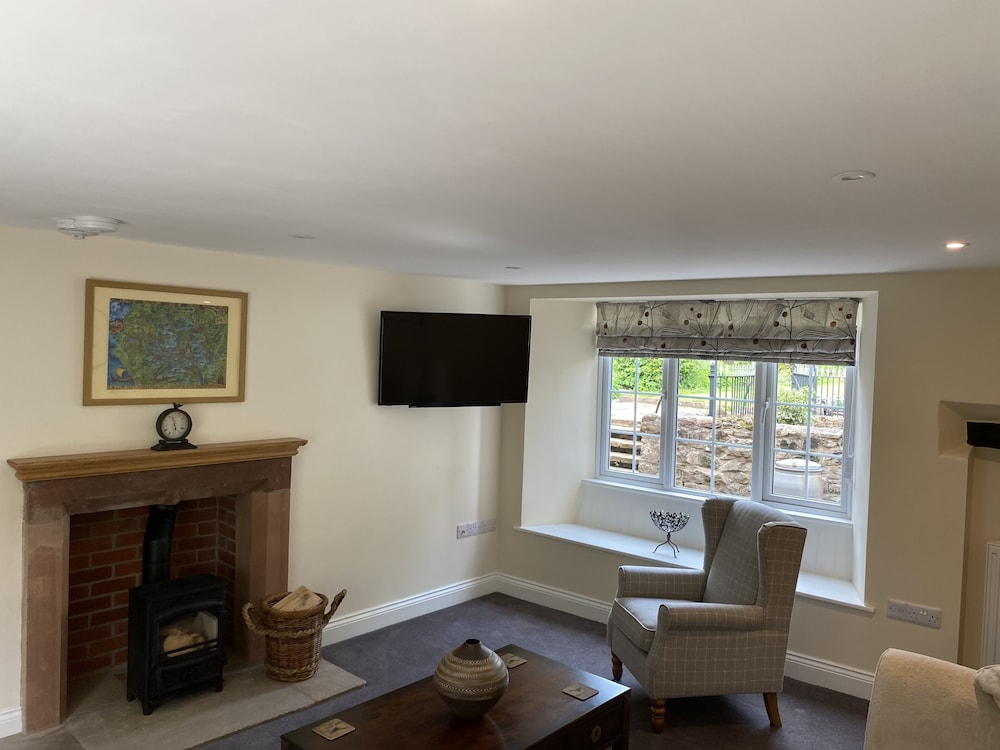

Duplicated image 8 (similarity: 86.18%): 202.jpg


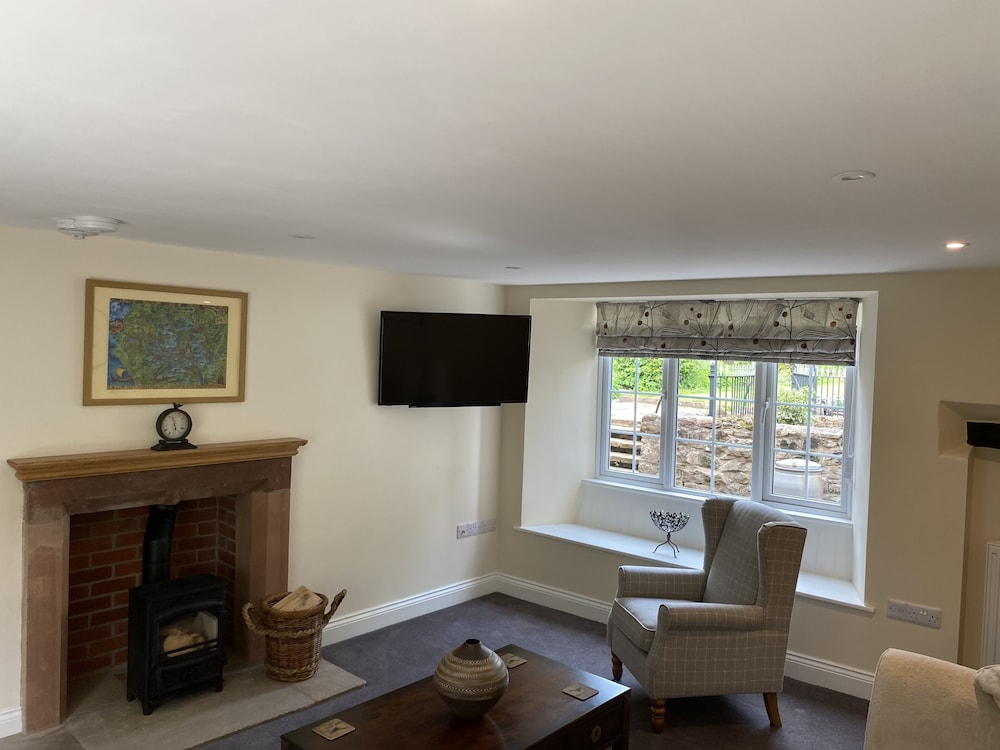

Duplicated image 9 (similarity: 86.18%): 24.jpg


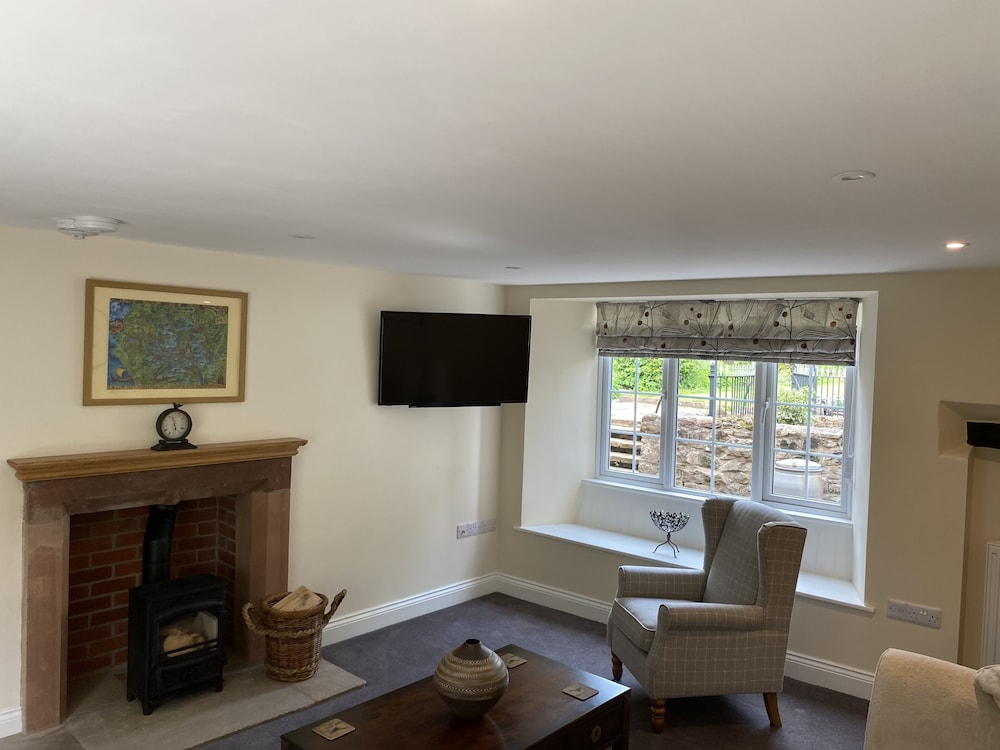

Duplicated image 10 (similarity: 86.18%): 25.jpg


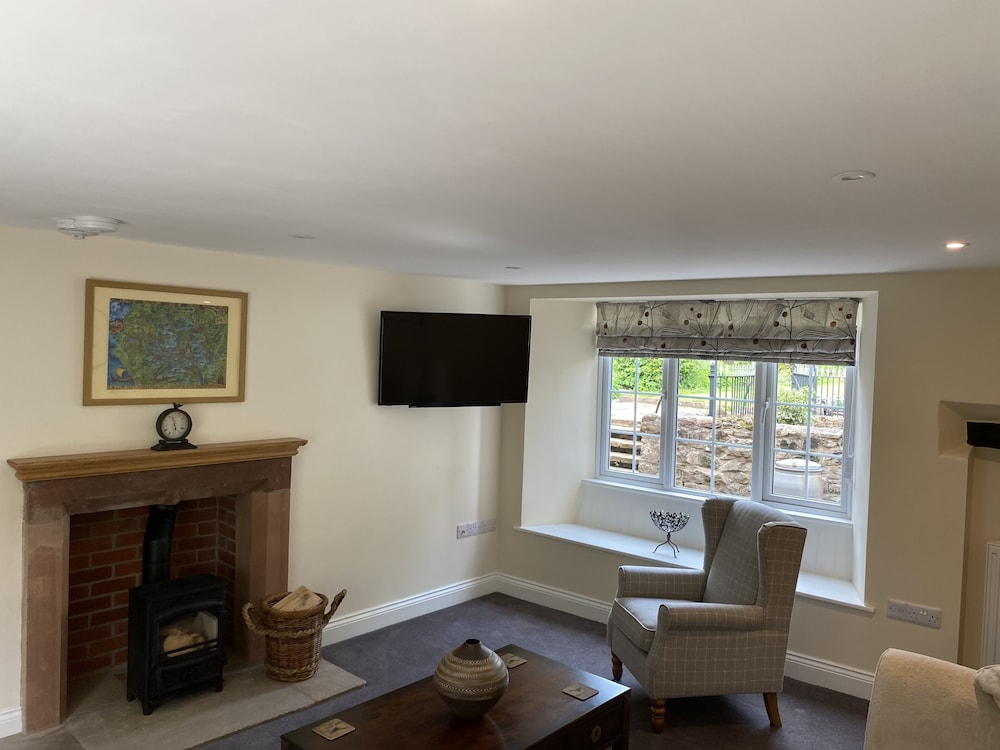

Duplicated image 11 (similarity: 89.54%): 28.jpg


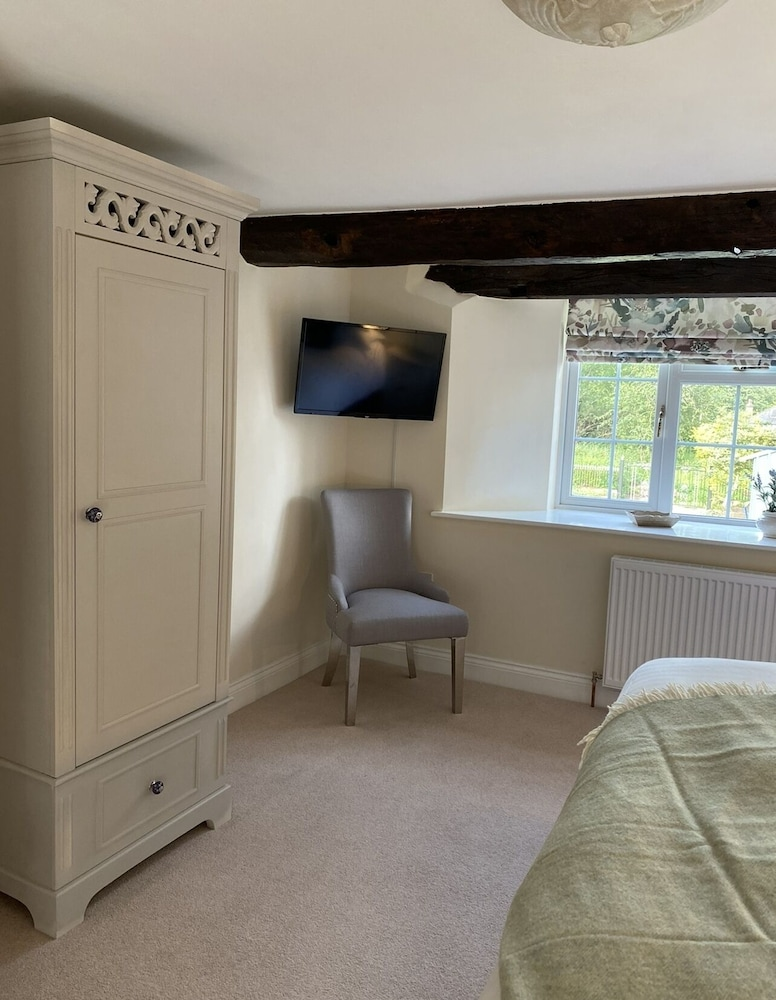

Duplicated image 12 (similarity: 89.54%): 5.jpg


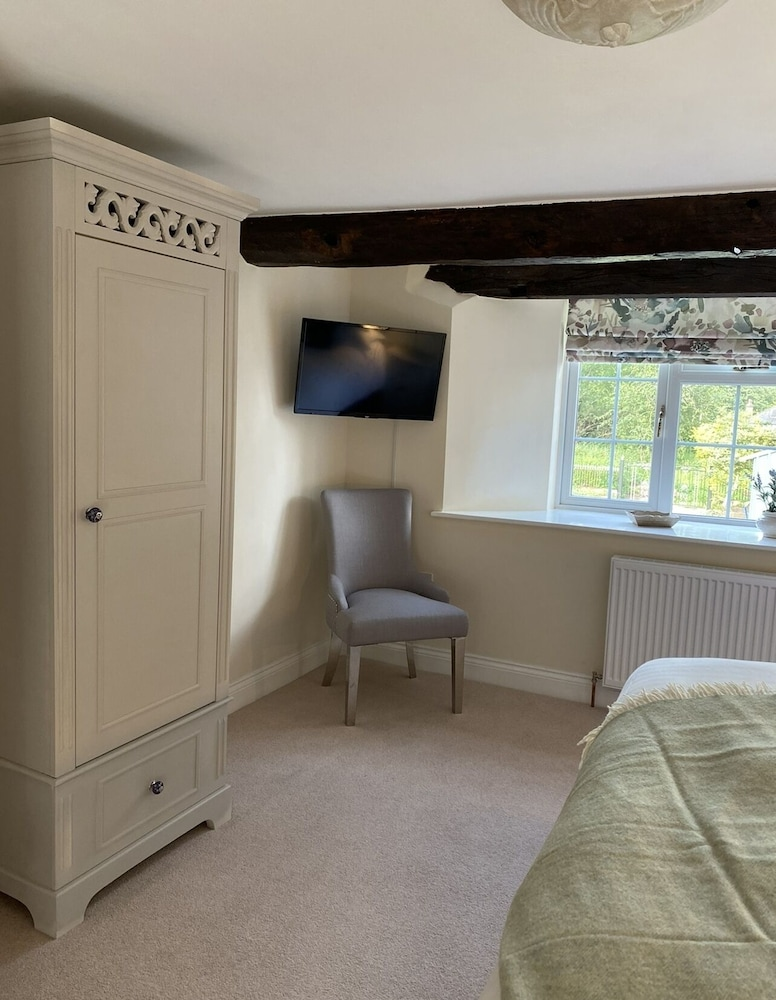

Duplicated image 13 (similarity: 100.00%): 64.jpg


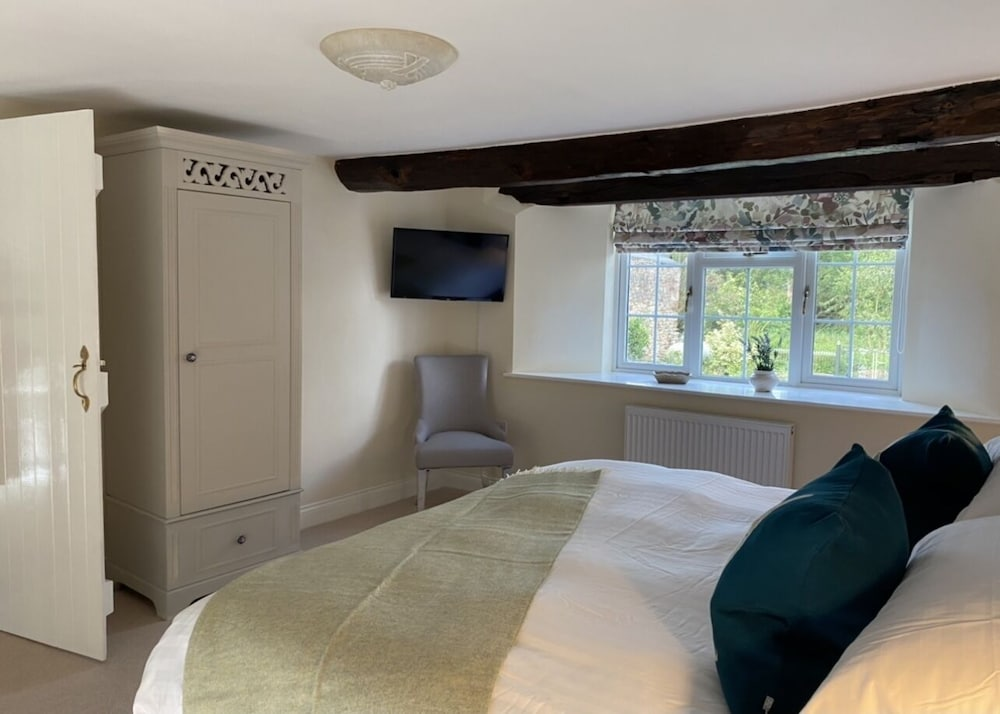

Duplicated image 14 (similarity: 100.00%): 87.jpg


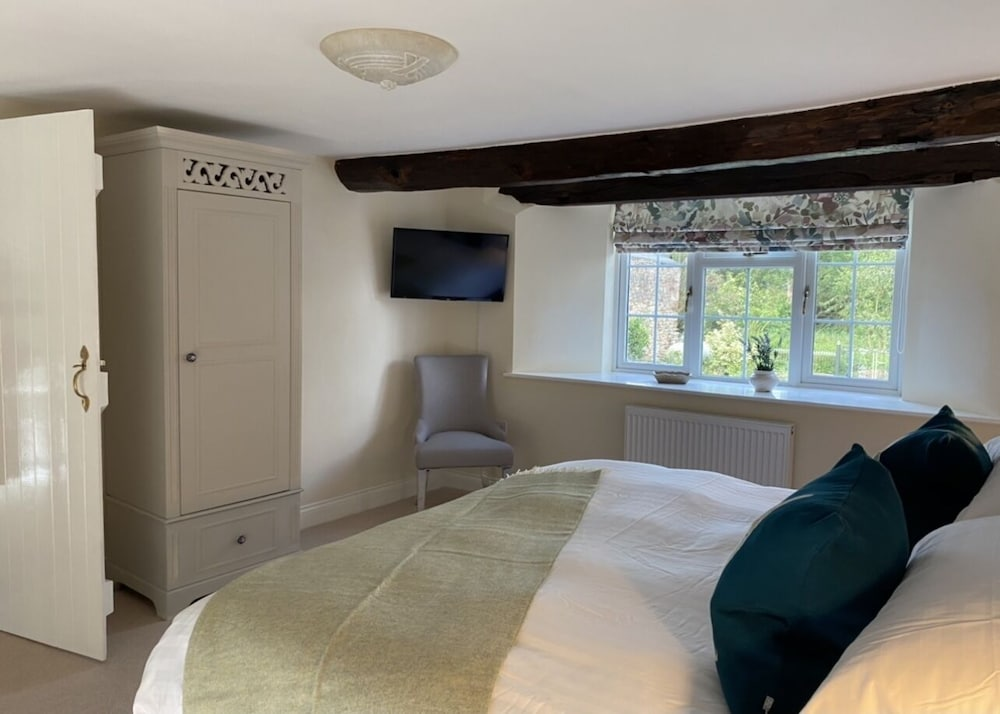

##########################
Base image: 10.jpg


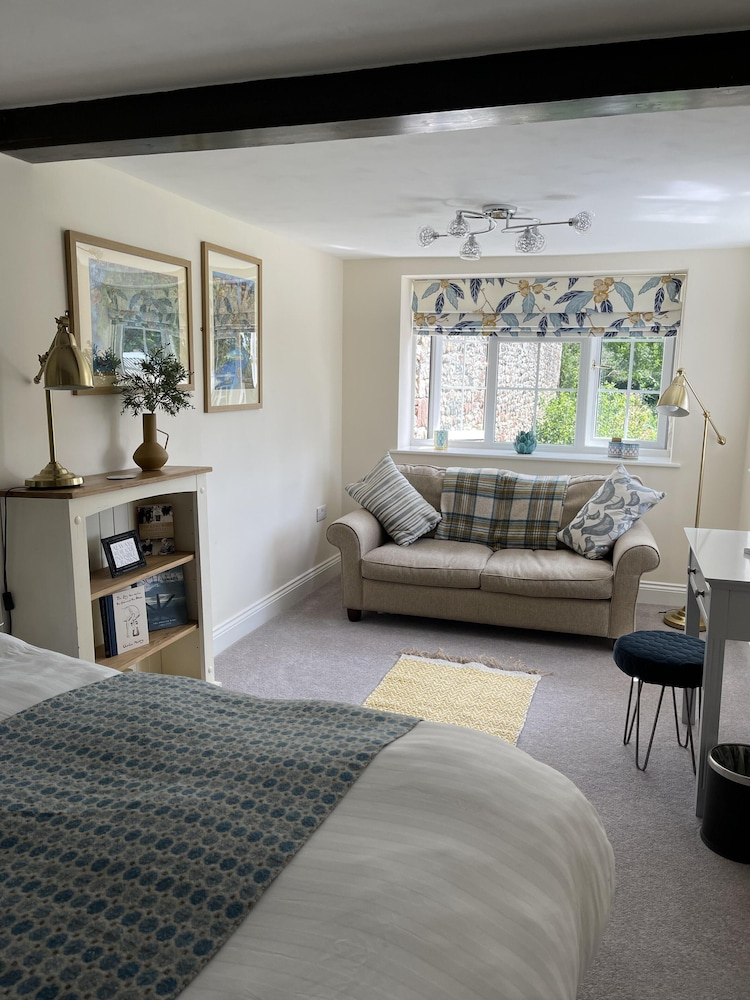

Duplicated image 1 (similarity: 100.00%): 154.jpg


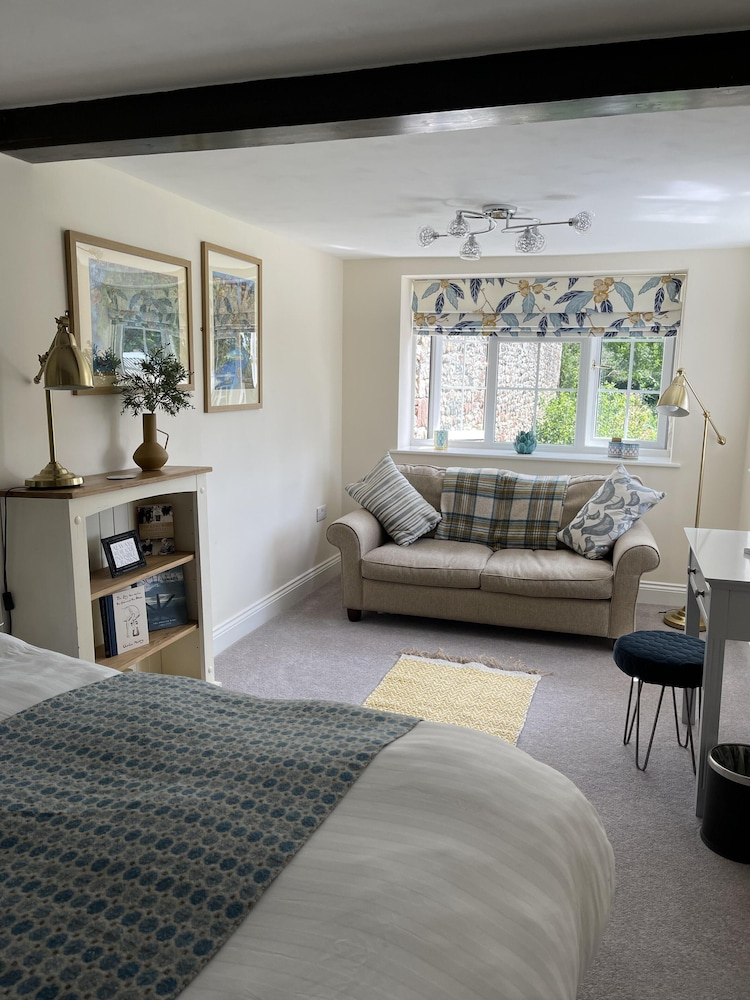

Duplicated image 2 (similarity: 85.61%): 158.jpg


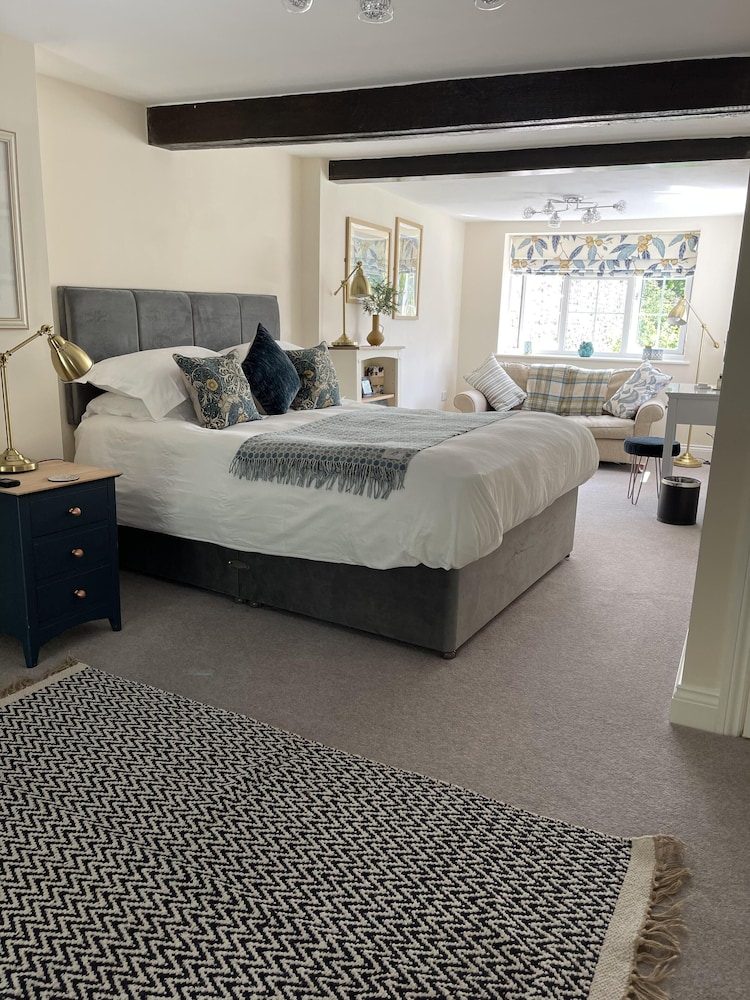

Duplicated image 3 (similarity: 100.00%): 178.jpg


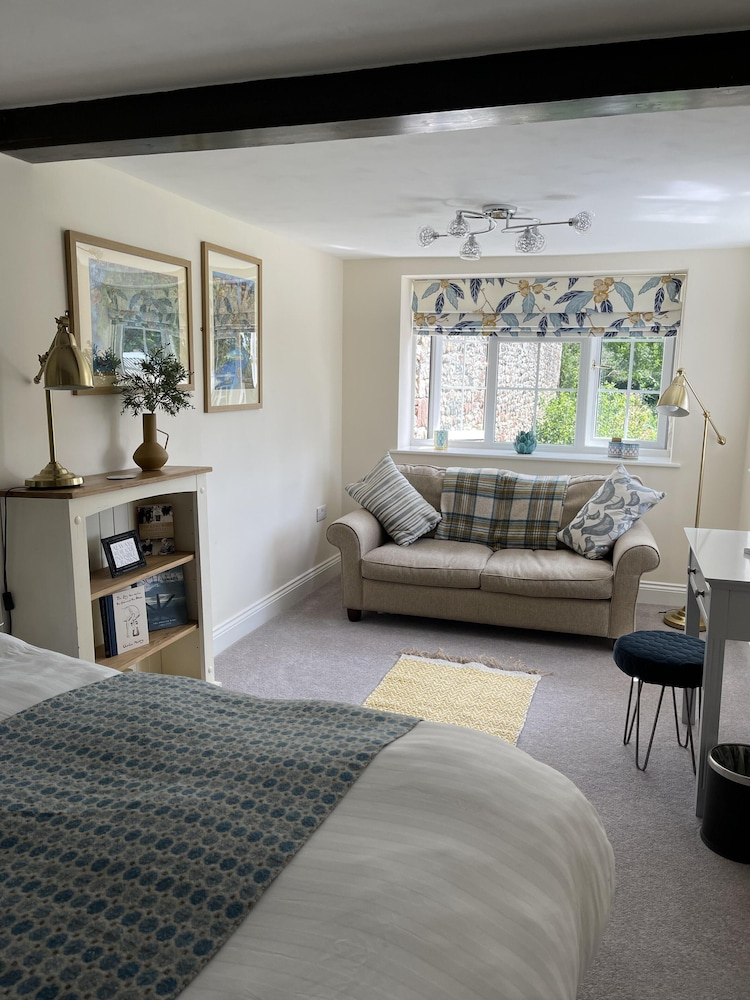

Duplicated image 4 (similarity: 85.61%): 2.jpg


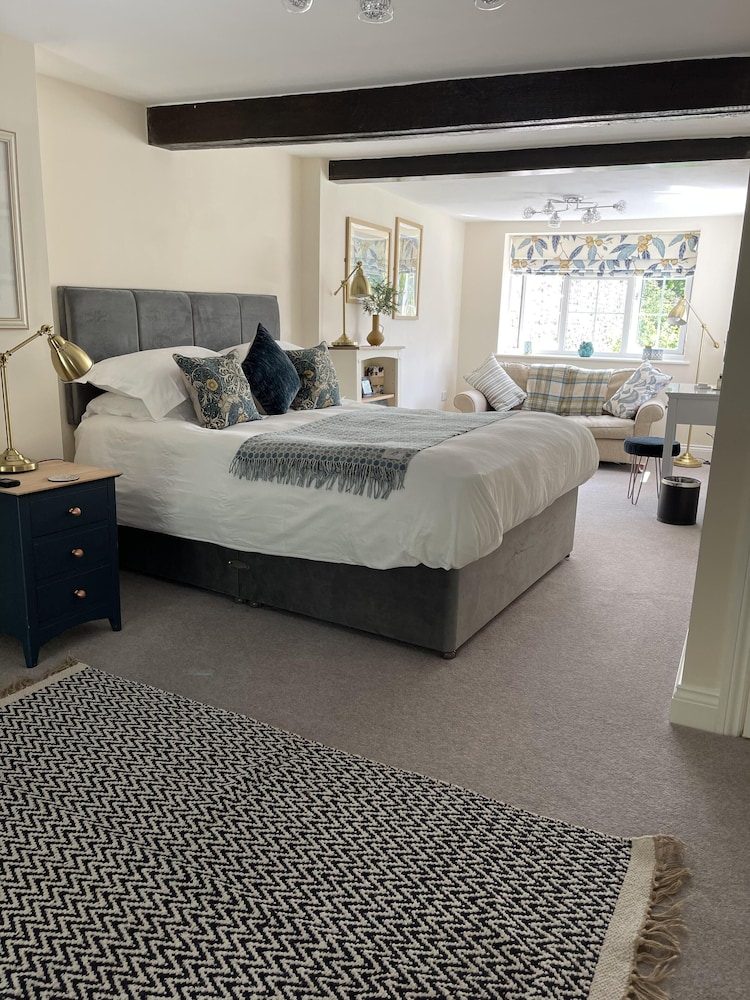

Duplicated image 5 (similarity: 100.00%): 35.jpg


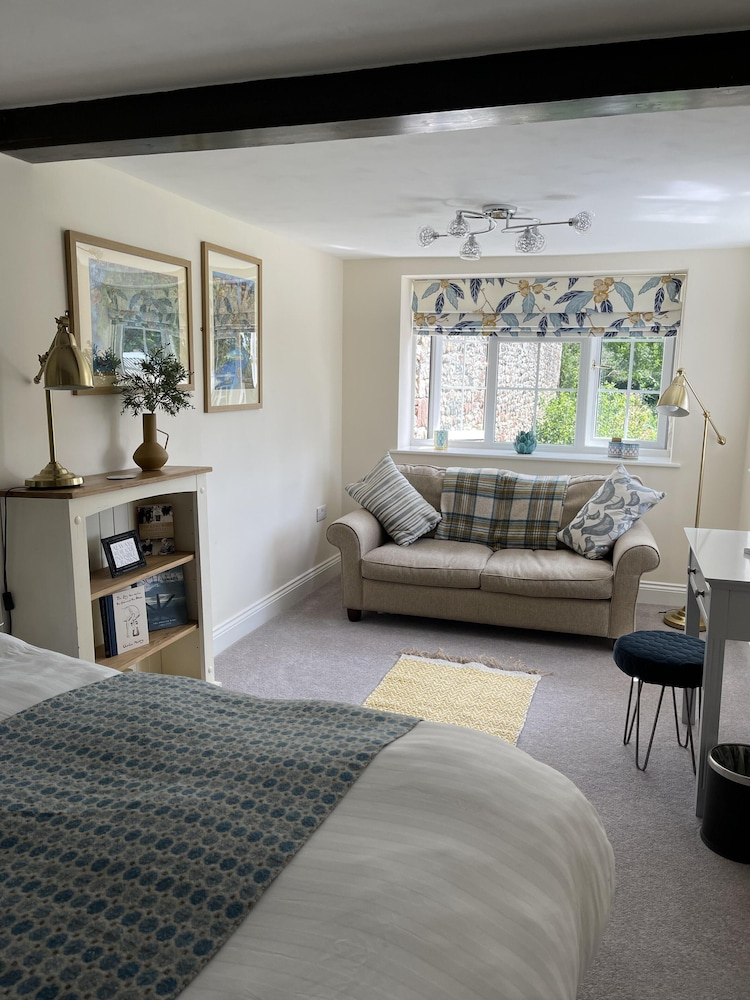

Duplicated image 6 (similarity: 85.61%): 48.jpg


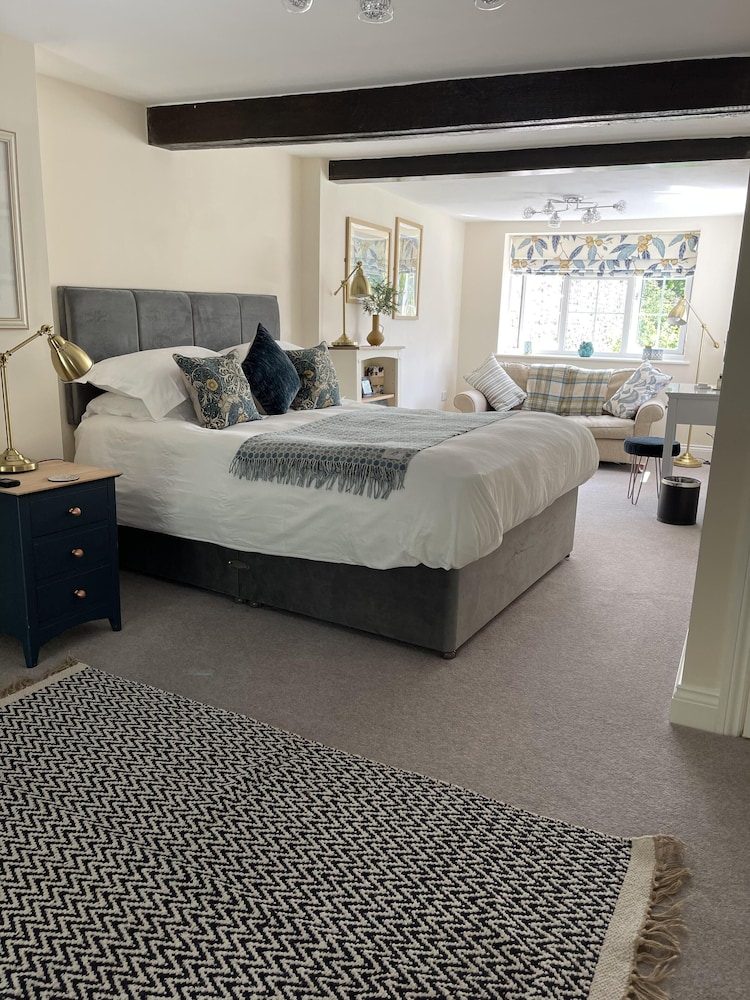

Duplicated image 7 (similarity: 100.00%): 56.jpg


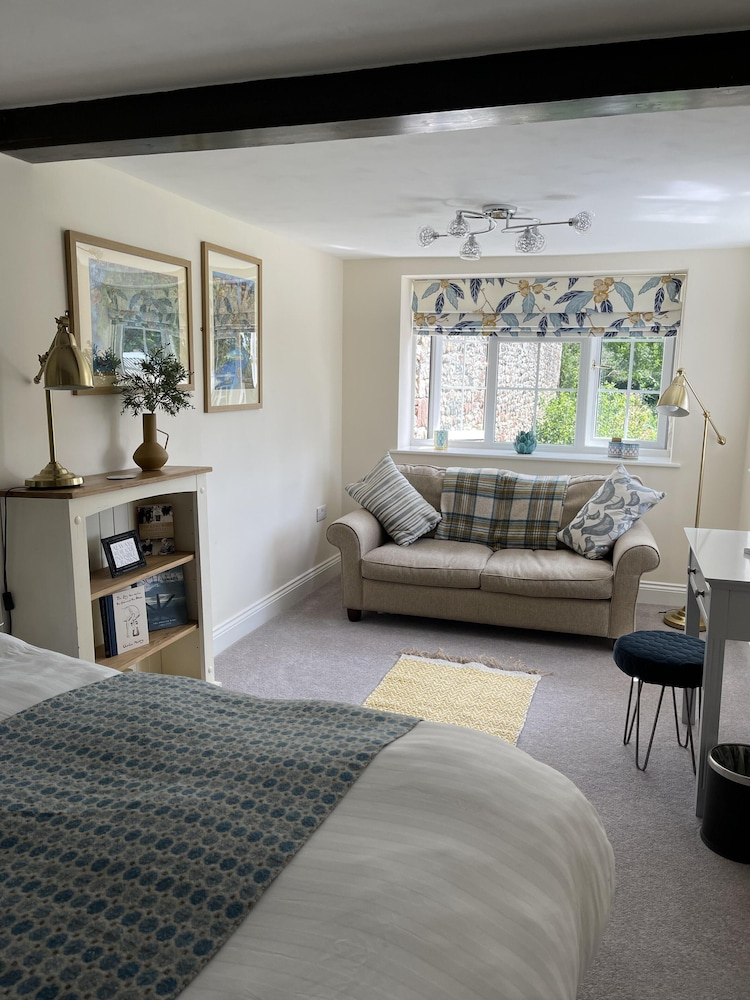

Duplicated image 8 (similarity: 85.61%): 62.jpg


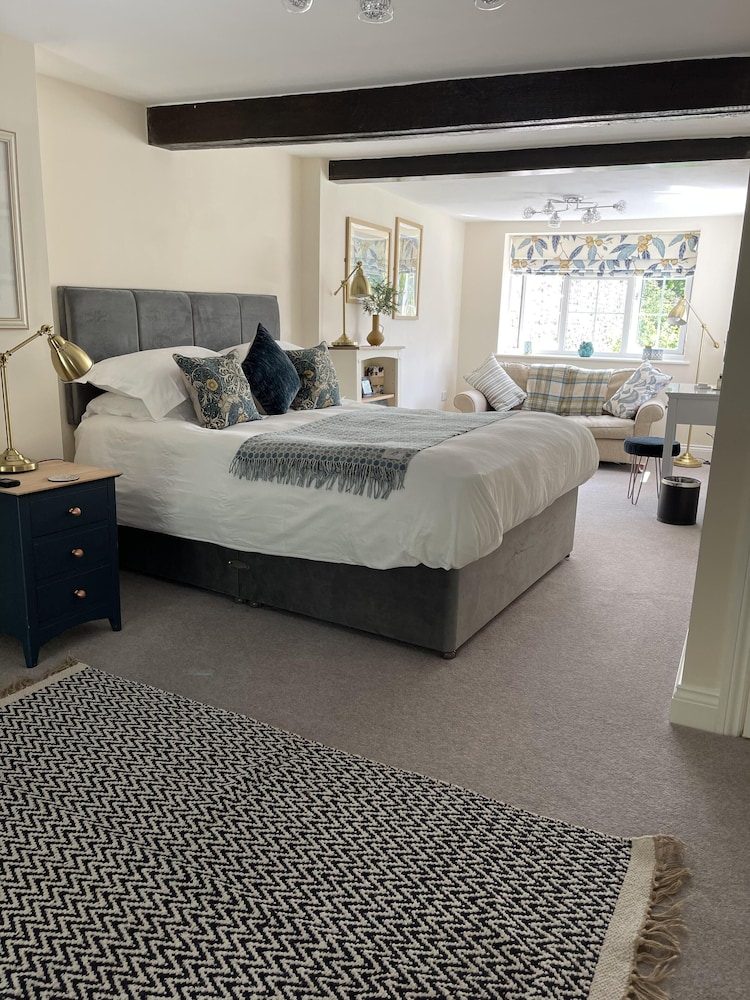

Duplicated image 9 (similarity: 85.61%): 83.jpg


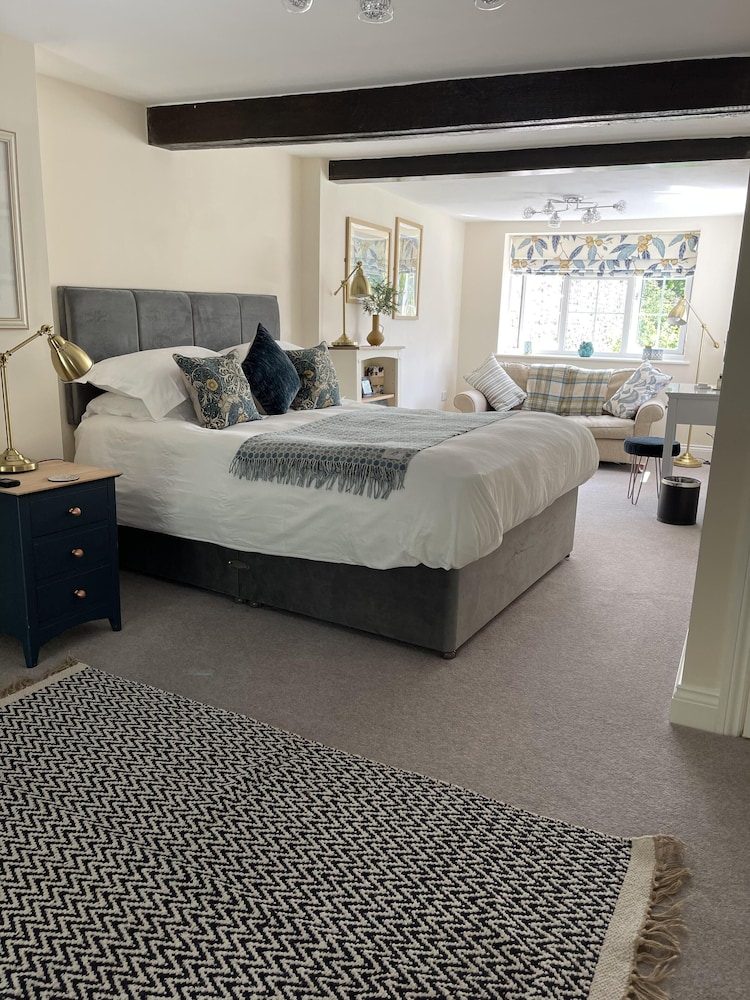

##########################


In [14]:
display_duplicated_images(group_id, images_dir_path, results_dir_path, first_n=2)